# Curvature Analysis

In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

/Users/pp420/miniconda3/envs/mdanalysis/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/pp420/miniconda3/envs/mdanalysis/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
def func_to_opt3(data, a, b, c, d, e, f, g, h):
    x = data[:,0]
    y = data[:,1]
    return np.array([a + b*(x) + c*(x**2) + d*(y) + e*x*y + f*(y**2) + g*(x**3) + h*(y**3)]).T[:,0]

def get_curvature3(data, params):
    x = data[:,0]
    y = data[:,1]
    a, b, c, d, e, f, g, h = params
    k_x = np.absolute(2*c + 6*g*x) / ((np.sqrt(1+(b +2*c*x + e*y + 3*g*x**2)**2))**3)
    k_y = np.absolute(2*f + 6*h*y) / ((np.sqrt(1+(d + e*x + 2*f*y + 3*h*y**2)**2))**3)
    K = k_x * k_y
    return K

In [90]:
u = mda.Universe('/Users/pp420/mres_aav_aavr_project/aav2_aavr_scaled_3/dir_v2r1/v2r1_nosolv.gro', 
                 '/Users/pp420/mres_aav_aavr_project/aav2_aavr_scaled_3/dir_v2r1/v2r1_nosolv.xtc')

phospho_beads_positions_per_frame = []
for t in u.trajectory:
    p = u.select_atoms("name PO4 and resid 33645:37638").positions
    phospho_beads_positions_per_frame.append(p)
phospho_beads_positions_per_frame = np.array(phospho_beads_positions_per_frame)
x = phospho_beads_positions_per_frame[:,:,0]
y = phospho_beads_positions_per_frame[:,:,1]
z = phospho_beads_positions_per_frame[:,:,2]


K_per_frame = []
for t in u.trajectory:
    ff = u.trajectory.frame
    xy = np.array(phospho_beads_positions_per_frame[ff,:,0:2])
    guess = (1,1,1,1,1,1,1,1)
    params, pcov = curve_fit(func_to_opt3, xy, z[ff], guess)
    K_out = get_curvature3(xy, params)
    K_per_frame.append(K_out.mean())
K_per_frame_A1 = np.array(K_per_frame)

u = mda.Universe('/Users/pp420/mres_aav_aavr_project/aav2_aavr_scaled_3/dir_v2r2/v2r2_nosolv.gro', 
                 '/Users/pp420/mres_aav_aavr_project/aav2_aavr_scaled_3/dir_v2r2/v2r2_nosolv.xtc')

phospho_beads_positions_per_frame = []
for t in u.trajectory:
    p = u.select_atoms("name PO4 and resid 33645:37638").positions
    phospho_beads_positions_per_frame.append(p)
phospho_beads_positions_per_frame = np.array(phospho_beads_positions_per_frame)
x = phospho_beads_positions_per_frame[:,:,0]
y = phospho_beads_positions_per_frame[:,:,1]
z = phospho_beads_positions_per_frame[:,:,2]


K_per_frame = []
for t in u.trajectory:
    ff = u.trajectory.frame
    xy = np.array(phospho_beads_positions_per_frame[ff,:,0:2])
    guess = (1,1,1,1,1,1,1,1)
    params, pcov = curve_fit(func_to_opt3, xy, z[ff], guess)
    K_out = get_curvature3(xy, params)
    K_per_frame.append(K_out.mean())
K_per_frame_A2 = np.array(K_per_frame)

u = mda.Universe('/Users/pp420/mres_aav_aavr_project/aav2_aavr_scaled_3/dir_v2r3/v2r3_nosolv.gro', 
                 '/Users/pp420/mres_aav_aavr_project/aav2_aavr_scaled_3/dir_v2r3/v2r3_nosolv.xtc')

phospho_beads_positions_per_frame = []
for t in u.trajectory:
    p = u.select_atoms("name PO4 and resid 33645:37638").positions
    phospho_beads_positions_per_frame.append(p)
phospho_beads_positions_per_frame = np.array(phospho_beads_positions_per_frame)
x = phospho_beads_positions_per_frame[:,:,0]
y = phospho_beads_positions_per_frame[:,:,1]
z = phospho_beads_positions_per_frame[:,:,2]


K_per_frame = []
for t in u.trajectory:
    ff = u.trajectory.frame
    xy = np.array(phospho_beads_positions_per_frame[ff,:,0:2])
    guess = (1,1,1,1,1,1,1,1)
    params, pcov = curve_fit(func_to_opt3, xy, z[ff], guess)
    K_out = get_curvature3(xy, params)
    K_per_frame.append(K_out.mean())
K_per_frame_A3 = np.array(K_per_frame)

u = mda.Universe('/Users/pp420/mres_aav_aavr_project/aav2_mem_scaled_3/dir_v2m1/v2m1_nosolv.gro', 
                 '/Users/pp420/mres_aav_aavr_project/aav2_mem_scaled_3/dir_v2m1/v2m1_nosolv.xtc')

phospho_beads_positions_per_frame = []
for t in u.trajectory:
    p = u.select_atoms("name PO4 and resid 31021:35243").positions
    phospho_beads_positions_per_frame.append(p)
phospho_beads_positions_per_frame = np.array(phospho_beads_positions_per_frame)
x = phospho_beads_positions_per_frame[:,:,0]
y = phospho_beads_positions_per_frame[:,:,1]
z = phospho_beads_positions_per_frame[:,:,2]


K_per_frame = []
for t in u.trajectory:
    ff = u.trajectory.frame
    xy = np.array(phospho_beads_positions_per_frame[ff,:,0:2])
    guess = (1,1,1,1,1,1,1,1)
    params, pcov = curve_fit(func_to_opt3, xy, z[ff], guess)
    K_out = get_curvature3(xy, params)
    K_per_frame.append(K_out.mean())
K_per_frame_M1 = np.array(K_per_frame)

u = mda.Universe('/Users/pp420/mres_aav_aavr_project/aav2_mem_scaled_3/dir_v2m2/v2m2_nosolv.gro', 
                 '/Users/pp420/mres_aav_aavr_project/aav2_mem_scaled_3/dir_v2m2/v2m2_nosolv.xtc')

phospho_beads_positions_per_frame = []
for t in u.trajectory:
    p = u.select_atoms("name PO4 and resid 31021:35243").positions
    phospho_beads_positions_per_frame.append(p)
phospho_beads_positions_per_frame = np.array(phospho_beads_positions_per_frame)
x = phospho_beads_positions_per_frame[:,:,0]
y = phospho_beads_positions_per_frame[:,:,1]
z = phospho_beads_positions_per_frame[:,:,2]


K_per_frame = []
for t in u.trajectory:
    ff = u.trajectory.frame
    xy = np.array(phospho_beads_positions_per_frame[ff,:,0:2])
    guess = (1,1,1,1,1,1,1,1)
    params, pcov = curve_fit(func_to_opt3, xy, z[ff], guess)
    K_out = get_curvature3(xy, params)
    K_per_frame.append(K_out.mean())
K_per_frame_M2 = np.array(K_per_frame)

u = mda.Universe('/Users/pp420/mres_aav_aavr_project/aav2_mem_scaled_3/dir_v2m3/v2m3_nosolv.gro', 
                 '/Users/pp420/mres_aav_aavr_project/aav2_mem_scaled_3/dir_v2m3/v2m3_nosolv.xtc')

phospho_beads_positions_per_frame = []
for t in u.trajectory:
    p = u.select_atoms("name PO4 and resid 31021:35243").positions
    phospho_beads_positions_per_frame.append(p)
phospho_beads_positions_per_frame = np.array(phospho_beads_positions_per_frame)
x = phospho_beads_positions_per_frame[:,:,0]
y = phospho_beads_positions_per_frame[:,:,1]
z = phospho_beads_positions_per_frame[:,:,2]


K_per_frame = []
for t in u.trajectory:
    ff = u.trajectory.frame
    xy = np.array(phospho_beads_positions_per_frame[ff,:,0:2])
    guess = (1,1,1,1,1,1,1,1)
    params, pcov = curve_fit(func_to_opt3, xy, z[ff], guess)
    K_out = get_curvature3(xy, params)
    K_per_frame.append(K_out.mean())
K_per_frame_M3 = np.array(K_per_frame)

u = mda.Universe('/Users/pp420/mres_aav_aavr_project/aavrx4_mem_scaled_2/dir_r4m1/r4m1_nosolv.gro', 
                 '/Users/pp420/mres_aav_aavr_project/aavrx4_mem_scaled_2/dir_r4m1/r4m1_nosolv.xtc')

phospho_beads_positions_per_frame = []
for t in u.trajectory:
    p = u.select_atoms("name PO4 and resid 2625:6590").positions
    phospho_beads_positions_per_frame.append(p)
phospho_beads_positions_per_frame = np.array(phospho_beads_positions_per_frame)
x = phospho_beads_positions_per_frame[:,:,0]
y = phospho_beads_positions_per_frame[:,:,1]
z = phospho_beads_positions_per_frame[:,:,2]


K_per_frame = []
for t in u.trajectory:
    ff = u.trajectory.frame
    xy = np.array(phospho_beads_positions_per_frame[ff,:,0:2])
    guess = (1,1,1,1,1,1,1,1)
    params, pcov = curve_fit(func_to_opt3, xy, z[ff], guess)
    K_out = get_curvature3(xy, params)
    K_per_frame.append(K_out.mean())
K_per_frame_R1 = np.array(K_per_frame)

u = mda.Universe('/Users/pp420/mres_aav_aavr_project/aavrx4_mem_scaled_2/dir_r4m2/r4m2_nosolv.gro', 
                 '/Users/pp420/mres_aav_aavr_project/aavrx4_mem_scaled_2/dir_r4m2/r4m2_nosolv.xtc')

phospho_beads_positions_per_frame = []
for t in u.trajectory:
    p = u.select_atoms("name PO4 and resid 2625:6590").positions
    phospho_beads_positions_per_frame.append(p)
phospho_beads_positions_per_frame = np.array(phospho_beads_positions_per_frame)
x = phospho_beads_positions_per_frame[:,:,0]
y = phospho_beads_positions_per_frame[:,:,1]
z = phospho_beads_positions_per_frame[:,:,2]


K_per_frame = []
for t in u.trajectory:
    ff = u.trajectory.frame
    xy = np.array(phospho_beads_positions_per_frame[ff,:,0:2])
    guess = (1,1,1,1,1,1,1,1)
    params, pcov = curve_fit(func_to_opt3, xy, z[ff], guess)
    K_out = get_curvature3(xy, params)
    K_per_frame.append(K_out.mean())
K_per_frame_R2 = np.array(K_per_frame)

u = mda.Universe('/Users/pp420/mres_aav_aavr_project/aavrx4_mem_scaled_2/dir_r4m3/r4m3_nosolv.gro', 
                 '/Users/pp420/mres_aav_aavr_project/aavrx4_mem_scaled_2/dir_r4m3/r4m3_nosolv.xtc')

phospho_beads_positions_per_frame = []
for t in u.trajectory:
    p = u.select_atoms("name PO4 and resid 2625:6590").positions
    phospho_beads_positions_per_frame.append(p)
phospho_beads_positions_per_frame = np.array(phospho_beads_positions_per_frame)
x = phospho_beads_positions_per_frame[:,:,0]
y = phospho_beads_positions_per_frame[:,:,1]
z = phospho_beads_positions_per_frame[:,:,2]


K_per_frame = []
for t in u.trajectory:
    ff = u.trajectory.frame
    xy = np.array(phospho_beads_positions_per_frame[ff,:,0:2])
    guess = (1,1,1,1,1,1,1,1)
    params, pcov = curve_fit(func_to_opt3, xy, z[ff], guess)
    K_out = get_curvature3(xy, params)
    K_per_frame.append(K_out.mean())
K_per_frame_R3 = np.array(K_per_frame)

/Users/pp420/miniconda3/envs/mdanalysis/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: A
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/Users/pp420/miniconda3/envs/mdanalysis/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/Users/pp420/miniconda3/envs/mdanalysis/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: E
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/Users/pp420/miniconda3/envs/mdanalysis/lib/python3.11/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.

KeyboardInterrupt: 

In [ ]:
np.save("curvature/K_per_frame_A1.npy", K_per_frame_A1)
np.save("curvature/K_per_frame_A2.npy", K_per_frame_A2)
np.save("curvature/K_per_frame_A3.npy", K_per_frame_A3)
np.save("curvature/K_per_frame_M1.npy", K_per_frame_M1)
np.save("curvature/K_per_frame_M2.npy", K_per_frame_M2)
np.save("curvature/K_per_frame_M3.npy", K_per_frame_M3)
np.save("curvature/K_per_frame_R1.npy", K_per_frame_R1)
np.save("curvature/K_per_frame_R2.npy", K_per_frame_R2)
np.save("curvature/K_per_frame_R3.npy", K_per_frame_R3)

In [3]:
## Loading files

K_per_frame_A1 = np.load("curvature/K_per_frame_A1.npy")
K_per_frame_A2 = np.load("curvature/K_per_frame_A2.npy")
K_per_frame_A3 = np.load("curvature/K_per_frame_A3.npy")
K_per_frame_M1 = np.load("curvature/K_per_frame_M1.npy")
K_per_frame_M2 = np.load("curvature/K_per_frame_M2.npy")
K_per_frame_M3 = np.load("curvature/K_per_frame_M3.npy")
K_per_frame_R1 = np.load("curvature/K_per_frame_R1.npy")
K_per_frame_R2 = np.load("curvature/K_per_frame_R2.npy")
K_per_frame_R3 = np.load("curvature/K_per_frame_R3.npy")

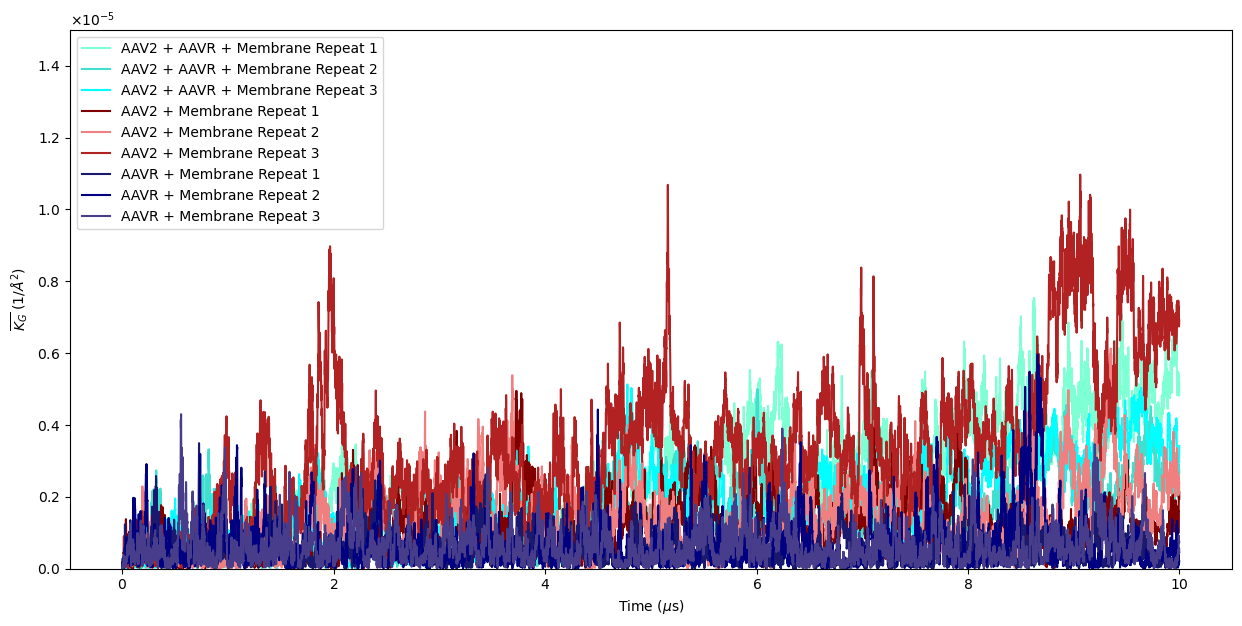

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.gca().ticklabel_format(useMathText=True)
plt.ylim(0,1.5e-5)
plt.plot(np.arange(0,10.001,0.001),K_per_frame_A1, color='aquamarine', label="AAV2 + AAVR + Membrane Repeat 1")
plt.plot(np.arange(0,10.001,0.001),K_per_frame_A2, color='turquoise', label="AAV2 + AAVR + Membrane Repeat 2")
plt.plot(np.arange(0,10.001,0.001),K_per_frame_A3, color='cyan', label="AAV2 + AAVR + Membrane Repeat 3")
plt.plot(np.arange(0,10.001,0.001),K_per_frame_M1, color='maroon', label="AAV2 + Membrane Repeat 1")
plt.plot(np.arange(0,10.001,0.001),K_per_frame_M2, color='lightcoral', label="AAV2 + Membrane Repeat 2")
plt.plot(np.arange(0,10.001,0.001),K_per_frame_M3, color='firebrick', label="AAV2 + Membrane Repeat 3")
plt.plot(np.arange(0,10.001,0.001),K_per_frame_R1, color='midnightblue', label="AAVR + Membrane Repeat 1")
plt.plot(np.arange(0,10.001,0.001),K_per_frame_R2, color='navy', label="AAVR + Membrane Repeat 2")
plt.plot(np.arange(0,10.001,0.001),K_per_frame_R3, color='darkslateblue', label="AAVR + Membrane Repeat 3")
plt.ylabel("$\overline{K_{G}}$ (1/$\AA^2$)")
plt.xlabel("Time ($\mu$s)")
plt.legend()
plt.savefig("curvature/CurvaturePlot.png", dpi=600)

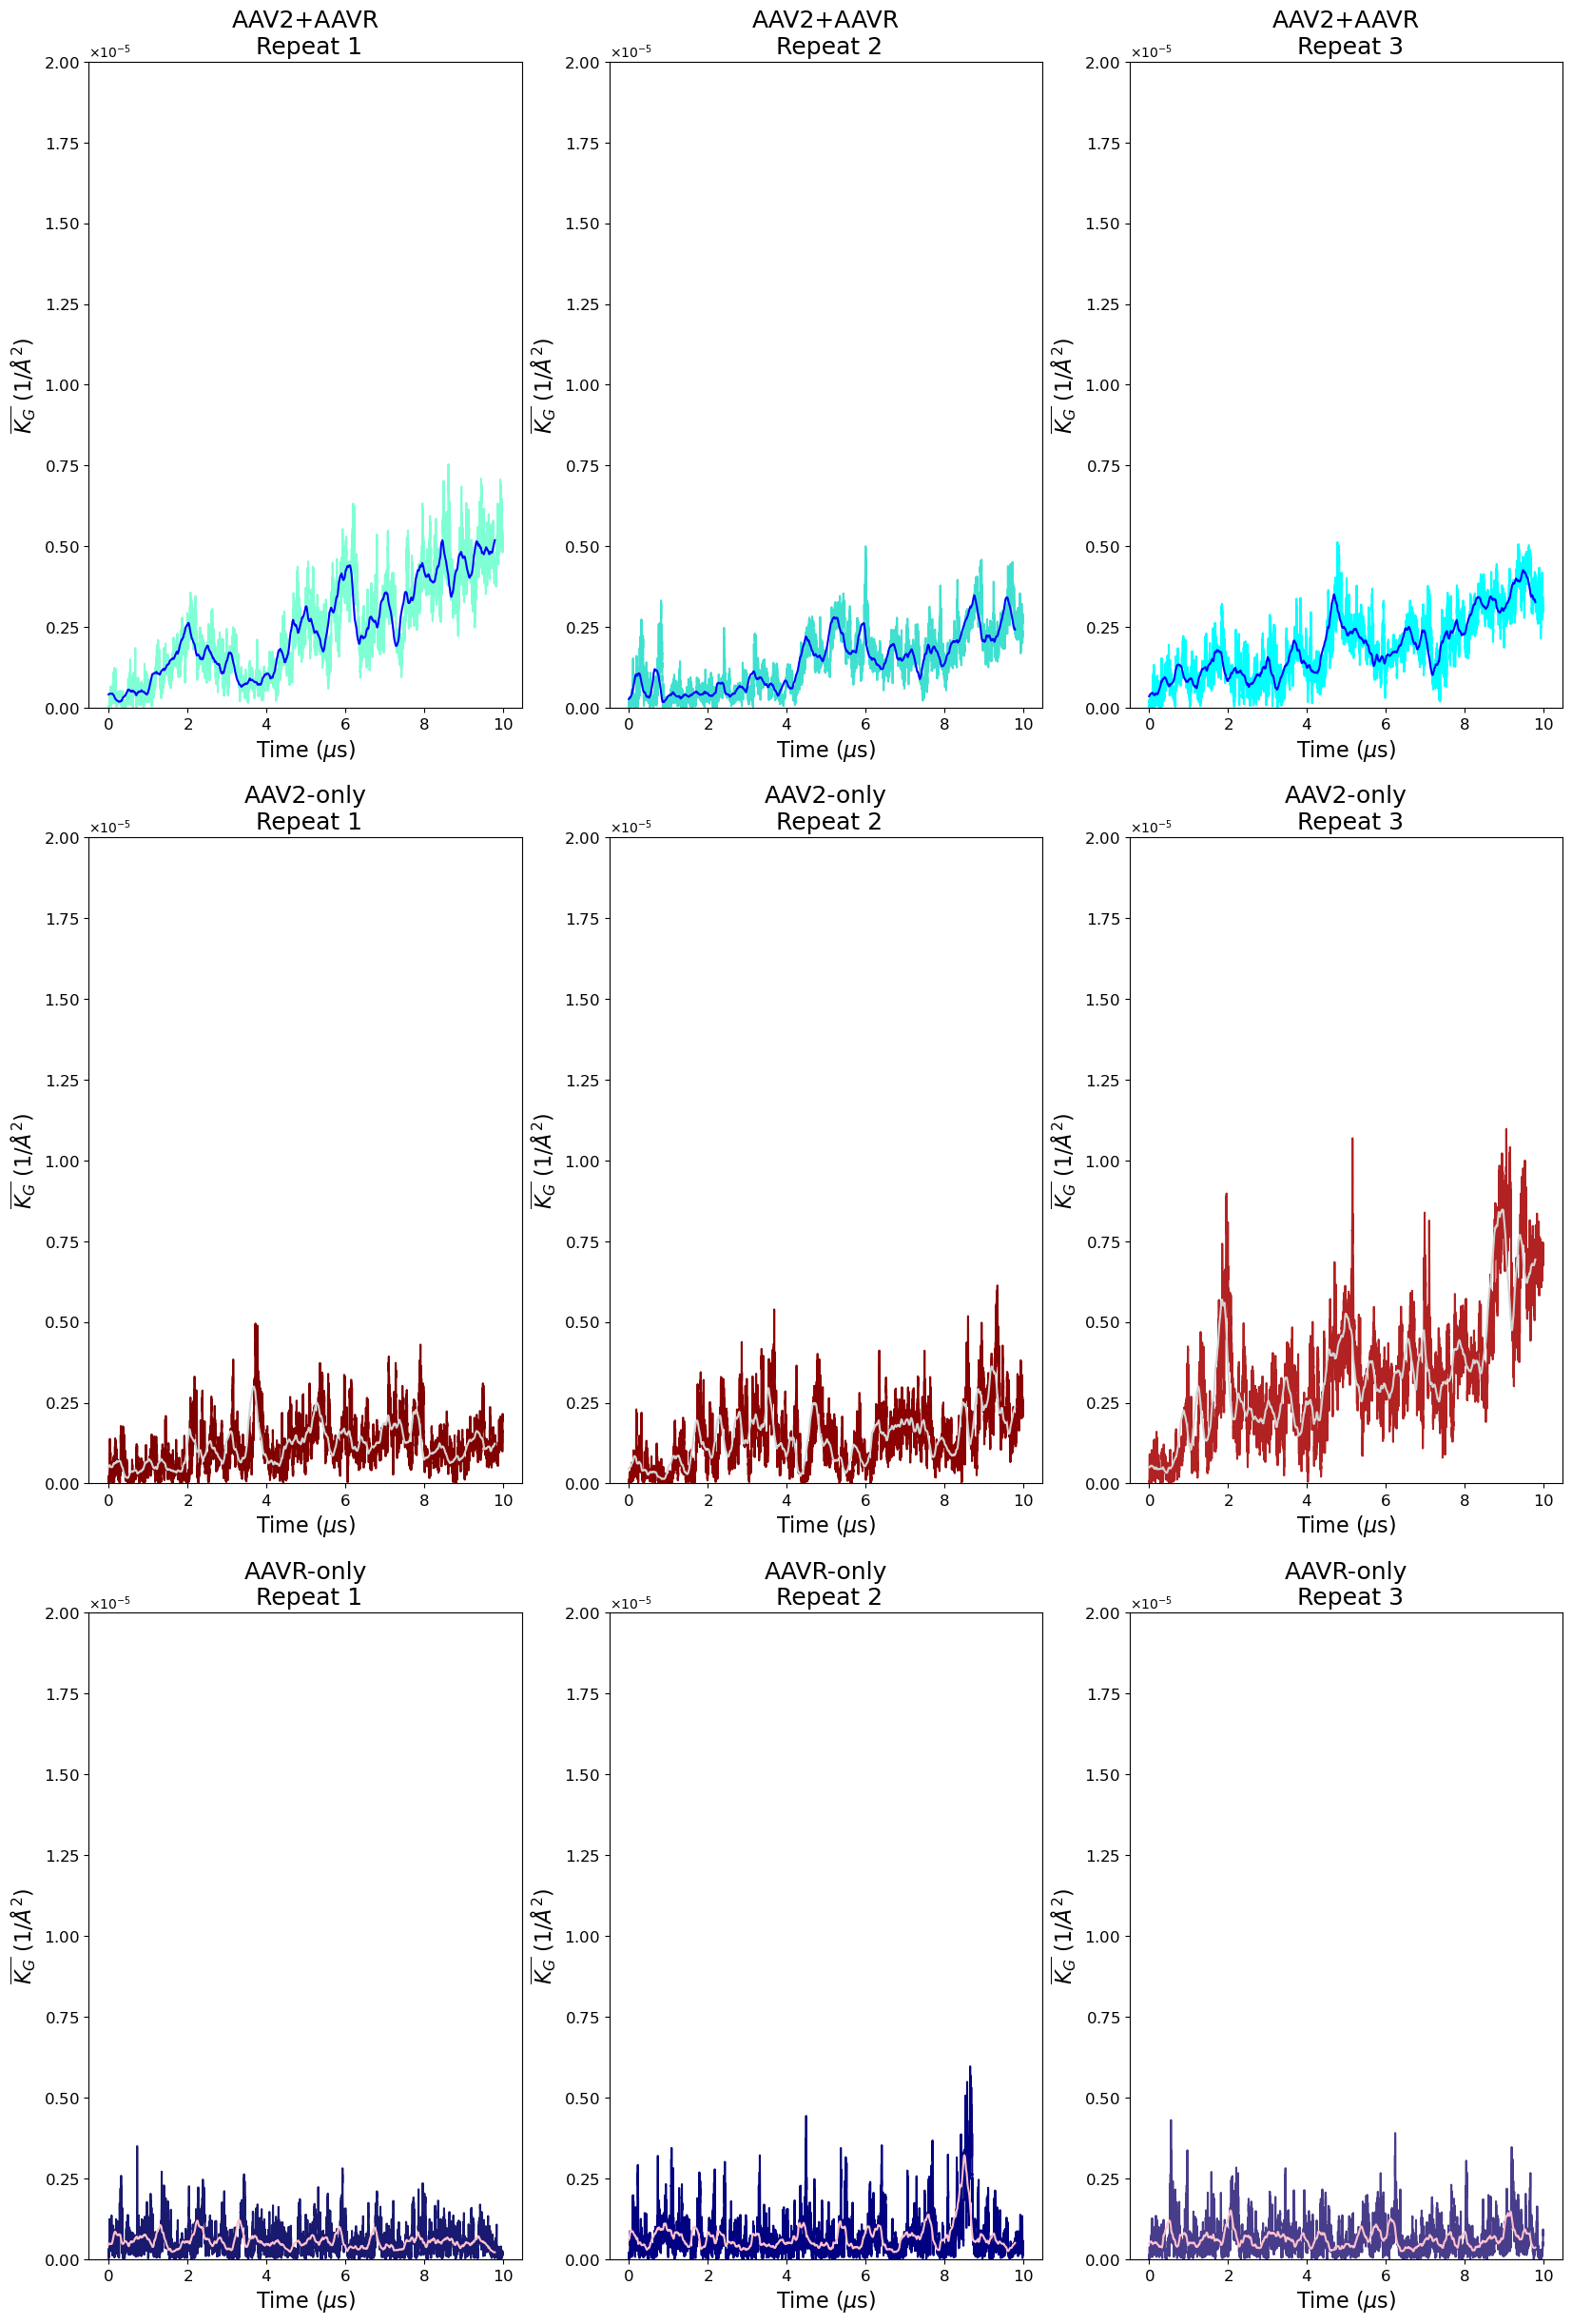

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3,3, figsize=(20,30))
w = 200

rolling_average = []
for i in range(len(K_per_frame_A1)-w):
    average = np.mean(K_per_frame_A1[i:i+w])
    rolling_average.append(average)

axs[0,0].ticklabel_format(useMathText=True)
axs[0,0].set_title("AAV2+AAVR\n Repeat 1", fontsize=18)
axs[0,0].set_ylim(0,2.0e-5)
axs[0,0].plot(np.arange(0,10.001,0.001),K_per_frame_A1, color='aquamarine')
axs[0,0].plot(np.arange(0,10.001-w*0.001,0.001),rolling_average, color='blue')
axs[0,0].set_ylabel("$\overline{K_{G}}$ (1/$\AA^2$)",fontsize=16)
axs[0,0].set_xlabel("Time ($\mu$s)",fontsize=16)
axs[0,0].tick_params(axis='both', which='major', labelsize=12)

rolling_average = []
for i in range(len(K_per_frame_A2)-w):
    average = np.mean(K_per_frame_A2[i:i+w])
    rolling_average.append(average)

axs[0,1].ticklabel_format(useMathText=True)
axs[0,1].set_ylim(0,2.0e-5)
axs[0,1].set_title("AAV2+AAVR\n Repeat 2", fontsize=18)
axs[0,1].plot(np.arange(0,10.001,0.001),K_per_frame_A2, color='turquoise')
axs[0,1].plot(np.arange(0,10.001-w*0.001,0.001),rolling_average, color='blue')
axs[0,1].set_ylabel("$\overline{K_{G}}$ (1/$\AA^2$)",fontsize=16)
axs[0,1].set_xlabel("Time ($\mu$s)",fontsize=16)
axs[0,1].tick_params(axis='both', which='major', labelsize=12)

rolling_average = []
for i in range(len(K_per_frame_A3)-w):
    average = np.mean(K_per_frame_A3[i:i+w])
    rolling_average.append(average)

axs[0,2].ticklabel_format(useMathText=True)
axs[0,2].set_ylim(0,2.0e-5)
axs[0,2].set_title("AAV2+AAVR\n Repeat 3", fontsize=18)
axs[0,2].plot(np.arange(0,10.001,0.001),K_per_frame_A3, color='cyan')
axs[0,2].plot(np.arange(0,10.001-w*0.001,0.001),rolling_average, color='blue')
axs[0,2].set_ylabel("$\overline{K_{G}}$ (1/$\AA^2$)",fontsize=16)
axs[0,2].set_xlabel("Time ($\mu$s)",fontsize=16)
axs[0,2].tick_params(axis='both', which='major', labelsize=12)

rolling_average = []
for i in range(len(K_per_frame_M1)-w):
    average = np.mean(K_per_frame_M1[i:i+w])
    rolling_average.append(average)

axs[1,0].ticklabel_format(useMathText=True)
axs[1,0].set_ylim(0,2.0e-5)
axs[1,0].set_title("AAV2-only\n Repeat 1", fontsize=18)
axs[1,0].plot(np.arange(0,10.001,0.001),K_per_frame_M1, color='maroon')
axs[1,0].plot(np.arange(0,10.001-w*0.001,0.001),rolling_average, color='lightgray')
axs[1,0].set_ylabel("$\overline{K_{G}}$ (1/$\AA^2$)",fontsize=16)
axs[1,0].set_xlabel("Time ($\mu$s)",fontsize=16)
axs[1,0].tick_params(axis='both', which='major', labelsize=12)

rolling_average = []
for i in range(len(K_per_frame_M2)-w):
    average = np.mean(K_per_frame_M2[i:i+w])
    rolling_average.append(average)

axs[1,1].ticklabel_format(useMathText=True)
axs[1,1].set_ylim(0,2.0e-5)
axs[1,1].set_title("AAV2-only\n Repeat 2", fontsize=18)
axs[1,1].plot(np.arange(0,10.001,0.001),K_per_frame_M2, color='darkred')
axs[1,1].plot(np.arange(0,10.001-w*0.001,0.001),rolling_average, color='lightgray')
axs[1,1].set_ylabel("$\overline{K_{G}}$ (1/$\AA^2$)",fontsize=16)
axs[1,1].set_xlabel("Time ($\mu$s)",fontsize=16)
axs[1,1].tick_params(axis='both', which='major', labelsize=12)

rolling_average = []
for i in range(len(K_per_frame_M3)-w):
    average = np.mean(K_per_frame_M3[i:i+w])
    rolling_average.append(average)

axs[1,2].ticklabel_format(useMathText=True)
axs[1,2].set_ylim(0,2.0e-5)
axs[1,2].set_title("AAV2-only\n Repeat 3", fontsize=18)
axs[1,2].plot(np.arange(0,10.001,0.001),K_per_frame_M3, color='firebrick')
axs[1,2].plot(np.arange(0,10.001-w*0.001,0.001),rolling_average, color='lightgray')
axs[1,2].set_ylabel("$\overline{K_{G}}$ (1/$\AA^2$)",fontsize=16)
axs[1,2].set_xlabel("Time ($\mu$s)",fontsize=16)
axs[1,2].tick_params(axis='both', which='major', labelsize=12)

rolling_average = []
for i in range(len(K_per_frame_R1)-w):
    average = np.mean(K_per_frame_R1[i:i+w])
    rolling_average.append(average)

axs[2,0].ticklabel_format(useMathText=True)
axs[2,0].set_ylim(0,2.0e-5)
axs[2,0].set_title("AAVR-only\n Repeat 1", fontsize=18)
axs[2,0].plot(np.arange(0,10.001,0.001),K_per_frame_R1, color='midnightblue')
axs[2,0].plot(np.arange(0,10.001-w*0.001,0.001),rolling_average, color='pink')
axs[2,0].set_ylabel("$\overline{K_{G}}$ (1/$\AA^2$)",fontsize=16)
axs[2,0].set_xlabel("Time ($\mu$s)",fontsize=16)
axs[2,0].tick_params(axis='both', which='major', labelsize=12)

rolling_average = []
for i in range(len(K_per_frame_R2)-w):
    average = np.mean(K_per_frame_R2[i:i+w])
    rolling_average.append(average)

axs[2,1].ticklabel_format(useMathText=True)
axs[2,1].set_ylim(0,2.0e-5)
axs[2,1].set_title("AAVR-only\n Repeat 2", fontsize=18)
axs[2,1].plot(np.arange(0,10.001,0.001),K_per_frame_R2, color='navy')
axs[2,1].plot(np.arange(0,10.001-w*0.001,0.001),rolling_average, color='pink')
axs[2,1].set_ylabel("$\overline{K_{G}}$ (1/$\AA^2$)",fontsize=16)
axs[2,1].set_xlabel("Time ($\mu$s)",fontsize=16)
axs[2,1].tick_params(axis='both', which='major', labelsize=12)

rolling_average = []
for i in range(len(K_per_frame_R3)-w):
    average = np.mean(K_per_frame_R3[i:i+w])
    rolling_average.append(average)

axs[2,2].ticklabel_format(useMathText=True)
axs[2,2].set_ylim(0,2.0e-5)
axs[2,2].set_title("AAVR-only\n Repeat 3", fontsize=18)
axs[2,2].plot(np.arange(0,10.001,0.001),K_per_frame_R3, color='darkslateblue')
axs[2,2].plot(np.arange(0,10.001-w*0.001,0.001),rolling_average, color='pink')
axs[2,2].set_ylabel("$\overline{K_{G}}$ (1/$\AA^2$)",fontsize=16)
axs[2,2].set_xlabel("Time ($\mu$s)",fontsize=16)
axs[2,2].tick_params(axis='both', which='major', labelsize=12)

plt.savefig("curvature/CurvaturePlot2.svg", dpi=600)


## Visualisation

In [ ]:
### plot
import MDAnalysis as mda
import numpy as np
from scipy.optimize import curve_fit
u = mda.Universe('/Users/pp420/mres_aav_aavr_project/aav2_aavr_scaled_3/dir_v2r1/v2r1_nosolv.gro', 
                 '/Users/pp420/mres_aav_aavr_project/aav2_aavr_scaled_3/dir_v2r1/v2r1_nosolv.xtc')
phospho_beads_positions_per_frame = []
for t in u.trajectory:
    p = u.select_atoms("name PO4 and resid 33645:37638").positions
    phospho_beads_positions_per_frame.append(p)
phospho_beads_positions_per_frame = np.array(phospho_beads_positions_per_frame)
x = phospho_beads_positions_per_frame[:,:,0]
y = phospho_beads_positions_per_frame[:,:,1]
z = phospho_beads_positions_per_frame[:,:,2]


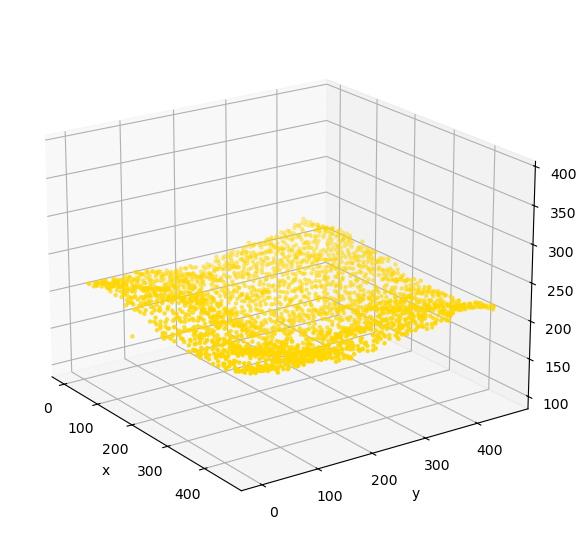

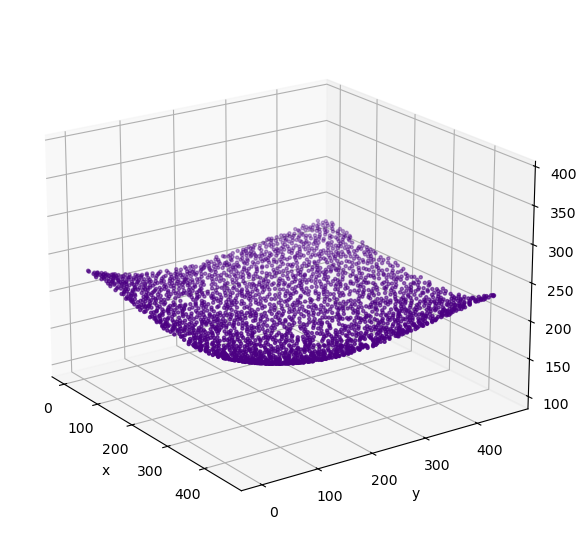

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
ff = 3000 ## Frame Number to Plot
ax = plt.figure(figsize=(7,7)).add_subplot(projection='3d')
ax.scatter(x[ff], y[ff], zs=z[ff], marker='.', color='gold')
ax.view_init(elev=20., azim=-35, roll=0)
ax.set_zlim(90,400)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

xy = phospho_beads_positions_per_frame[ff,:,0:2]
guess = (1,1,1,1,1,1,1,1)
params, pcov = curve_fit(func_to_opt3, xy, z[ff], guess)
a,b,c,d,e,f,g,h = params
zz = func_to_opt3(xy,a,b,c,d,e,f,g,h)
ax = plt.figure(figsize=(7,7)).add_subplot(projection='3d')
ax.scatter(x[ff], y[ff], zs=zz, marker='.', color='indigo')
ax.set_zlim(90,400)
ax.view_init(elev=20, azim=-35, roll=0)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [ ]:
def mse(zz,zs):
    return ((zz - zs)**2).mean()

In [ ]:
ff = 10000

xy = phospho_beads_positions_per_frame[ff,:,0:2]
zs = phospho_beads_positions_per_frame[ff,:,2]
guess = (1,1,1,1,1,1,1,1)
params, pcov = curve_fit(func_to_opt3, xy, zs, guess)
a,b,c,d,e,f,g,h = params
zz = func_to_opt3(xy,a,b,c,d,e,f,g,h)
mseff  = mse(zz,zs)

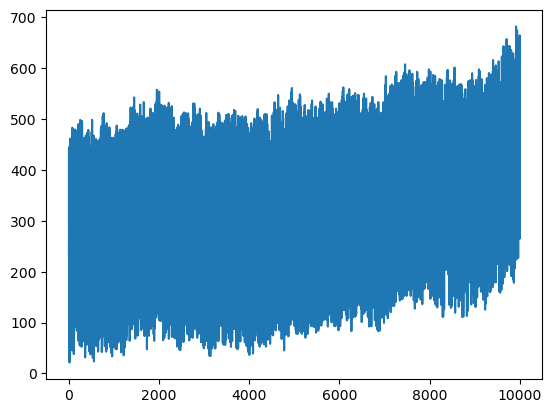

In [ ]:
mses = np.empty((len(phospho_beads_positions_per_frame)))

for ff in range(len(phospho_beads_positions_per_frame)):
    xy = phospho_beads_positions_per_frame[ff,:,0:2]
    zs = phospho_beads_positions_per_frame[ff,:,2]
    guess = (1,1,1,1,1,1,1,1)
    params, pcov = curve_fit(func_to_opt3, xy, zs, guess)
    a,b,c,d,e,f,g,h = params
    zz = func_to_opt3(xy,a,b,c,d,e,f,g,h)
    mseff = mse(zz,zs)
    mses[ff] += mseff
plt.plot(mses)

Text(0.5, 0, 'Time (ns)')

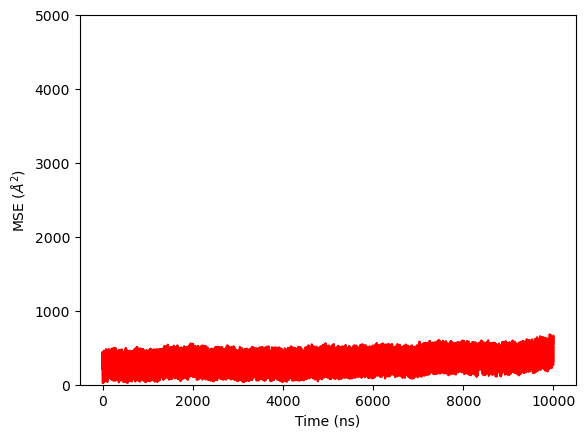

In [ ]:
%matplotlib inline
plt.plot(mses,color='red')
plt.ylim(0,5000)
plt.ylabel("MSE $(\AA^2)$")
plt.xlabel("Time (ns)")

In [ ]:
np.sqrt(5000)

70.71067811865476

In [10]:
print(K_per_frame_A1[9000:10000].mean()/ K_per_frame_A1[:1000].mean())
print(K_per_frame_M1[9000:10000].mean()/ K_per_frame_M1[:1000].mean())
print(K_per_frame_M3[9000:10000].mean()/ K_per_frame_M3[:1000].mean())

11.709646
2.7577372
8.966921


In [27]:
A = np.array([K_per_frame_A1[-1],K_per_frame_A2[-1],K_per_frame_A3[-1]])
print(A.mean())
print(A.std()/np.sqrt(np.size(A)))


3.6761967e-06
5.132789806565535e-07


In [24]:
M = np.array([K_per_frame_M1[-1],K_per_frame_M2[-1]])
print(M.mean())
print(M.std()/np.sqrt(np.size(M)))

2.1716032e-06
1.6321983828210075e-07


In [23]:
M_ = np.array([K_per_frame_M1[0],K_per_frame_M2[0]])
print(M_.mean())
print(M_.std()/np.sqrt(np.size(M)))

1.2937189e-09
2.723960275724988e-10


In [23]:
u = mda.Universe('/Users/pp420/mres_aav_aavr_project/dir_v2m3_10to20_nosolv/v2m3_10to20_nosolv.gro', 
                 '/Users/pp420/mres_aav_aavr_project/dir_v2m3_10to20_nosolv/v2m3_10to20_nosolv.xtc')

phospho_beads_positions_per_frame = []
for t in u.trajectory:
    p = u.select_atoms("name PO4 and resid 31021:35243").positions
    phospho_beads_positions_per_frame.append(p)
phospho_beads_positions_per_frame = np.array(phospho_beads_positions_per_frame)
x = phospho_beads_positions_per_frame[:,:,0]
y = phospho_beads_positions_per_frame[:,:,1]
z = phospho_beads_positions_per_frame[:,:,2]


K_per_frame = []
for t in u.trajectory:
    ff = u.trajectory.frame
    xy = np.array(phospho_beads_positions_per_frame[ff,:,0:2])
    guess = (1,1,1,1,1,1,1,1)
    params, pcov = curve_fit(func_to_opt3, xy, z[ff], guess)
    K_out = get_curvature3(xy, params)
    K_per_frame.append(K_out.mean())
K_per_frame_A1 = np.array(K_per_frame)

In [8]:
K_per_frame_M3 = np.load("curvature/K_per_frame_M3.npy")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


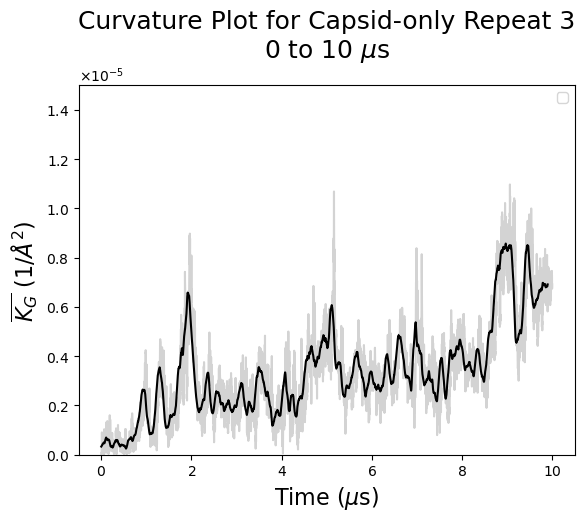

In [27]:
import matplotlib.pyplot as plt
plt.gca().ticklabel_format(useMathText=True)
rolling_average = []
w = 100
for i in range(len(K_per_frame_M3)-w):
    average = np.mean(K_per_frame_M3[i:i+w])
    rolling_average.append(average)

plt.ylim(0,1.5e-5)
plt.plot(np.arange(0,10.001,0.001),K_per_frame_M3, color='lightgray')
plt.plot(np.arange(0,10.001-w*0.001,0.001),rolling_average, color='black')
plt.title("Curvature Plot for Capsid-only Repeat 3\n0 to 10 $\mu$s", fontsize=18)
plt.ylabel("$\overline{K_{G}}$ (1/$\AA^2$)", fontsize=16)
plt.xlabel("Time ($\mu$s)", fontsize=16)
plt.legend()
plt.savefig("curvature/CurvaturePlot_v2m3_0to10.png", dpi=600)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


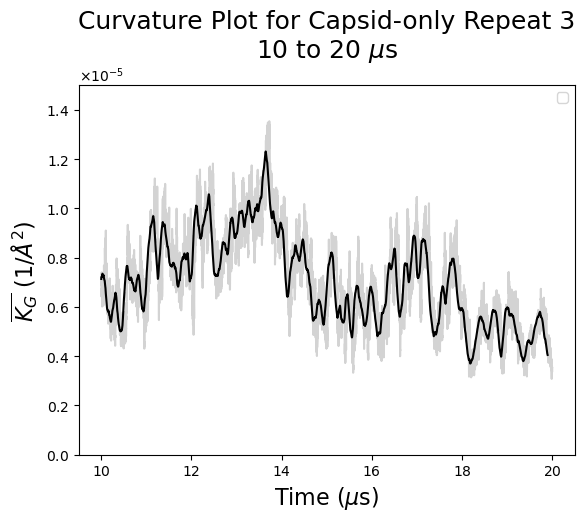

In [29]:
import matplotlib.pyplot as plt
plt.gca().ticklabel_format(useMathText=True)
rolling_average = []
w = 100
for i in range(len(K_per_frame_A1)-w):
    average = np.mean(K_per_frame_A1[i:i+w])
    rolling_average.append(average)

plt.ylim(0,1.5e-5)
plt.plot(np.arange(10.001,20.001,0.001),K_per_frame_A1, color='lightgray')
plt.plot(np.arange(10.00,20.001-w*0.001,0.001),rolling_average, color='black')
plt.title("Curvature Plot for Capsid-only Repeat 3\n10 to 20 $\mu$s", fontsize=18)
plt.ylabel("$\overline{K_{G}}$ (1/$\AA^2$)", fontsize=16)
plt.xlabel("Time ($\mu$s)", fontsize=16)
plt.legend()
plt.savefig("curvature/CurvaturePlot_v2m3_0to10.png", dpi=600)